## Trabalho 1 de Regressão

#### 1. Carregando pacotes

In [ ]:
library(hnp) # pacote para envelope simulado
library(lmtest) # teste reset
library(car) # para teste de multicolinearidade (fatores de inflacao de variancia)
library(tseries) # teste de Jarque-Bera

#### 2. Importando dados

In [8]:
dados <- read.table("dados/dados-trabalho1.txt",h=T)
head(dados)

,y,x1,x2,x3,x4,x5,x6,x7
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,110.038,1,57.361,0.434,4.317,12,1.715,104.320
2,86.445,1,52.070,0.437,4.052,13,2.221,94.936
3,152.419,1,61.397,0.727,7.854,8,7.148,87.870
4,114.720,1,42.482,0.244,2.297,9,2.272,103.660
5,111.444,1,29.660,0.449,4.509,6,2.444,101.167
6,147.882,1,58.217,0.363,4.506,13,6.971,86.432


y = variável resposta/variável dependente/endógena 

x1, x2, x3, x4, x5, x6 e x7 = covariáveis/variáveis independentes/exógenas

#### 3. Análise descritiva

In [9]:
summary(dados)

       y                x1               x2               x3        
 Min.   : 43.90   Min.   :0.0000   Min.   : 24.32   Min.   :0.0860  
 1st Qu.: 85.96   1st Qu.:0.0000   1st Qu.: 44.51   1st Qu.:0.3090  
 Median :105.88   Median :1.0000   Median : 55.05   Median :0.4270  
 Mean   :111.00   Mean   :0.6168   Mean   : 52.80   Mean   :0.4466  
 3rd Qu.:127.98   3rd Qu.:1.0000   3rd Qu.: 59.79   3rd Qu.:0.5615  
 Max.   :259.91   Max.   :1.0000   Max.   :102.59   Max.   :0.9240  
       x4              x5              x6               x7        
 Min.   :0.822   Min.   : 3.00   Min.   : 0.000   Min.   : 74.92  
 1st Qu.:3.163   1st Qu.: 8.00   1st Qu.: 0.840   1st Qu.: 93.78  
 Median :4.422   Median :11.00   Median : 2.490   Median :100.89  
 Mean   :4.517   Mean   :10.47   Mean   : 3.613   Mean   :100.44  
 3rd Qu.:5.495   3rd Qu.:13.00   3rd Qu.: 5.415   3rd Qu.:106.93  
 Max.   :9.068   Max.   :21.00   Max.   :18.767   Max.   :146.85  

In [10]:
cor(dados)

,y,x1,x2,x3,x4,x5,x6,x7
y,1.00000000,0.23490266,0.05849505,0.20454929,0.22926803,0.17610611,0.91622003,-0.04402367
x1,0.23490266,1.00000000,-0.01147521,0.09072338,0.09408009,0.06330647,-0.03130120,0.11475532
x2,0.05849505,-0.01147521,1.00000000,0.17953373,0.16006808,0.17923504,0.10810729,0.13952750
x3,0.20454929,0.09072338,0.17953373,1.00000000,0.95864032,-0.00811143,0.07302343,0.12269842
x4,0.22926803,0.09408009,0.16006808,0.95864032,1.00000000,-0.02744731,0.09554190,0.05386186
x5,0.17610611,0.06330647,0.17923504,-0.00811143,-0.02744731,1.00000000,0.19293278,0.24558583
x6,0.91622003,-0.03130120,0.10810729,0.07302343,0.09554190,0.19293278,1.00000000,-0.03669080
x7,-0.04402367,0.11475532,0.13952750,0.12269842,0.05386186,0.24558583,-0.03669080,1.00000000


Podemos observar que há uma correlação muito forte entre x4 e x3 (0.95864032), possivelmente uma multicolineariedade, algo que devemos evitar.

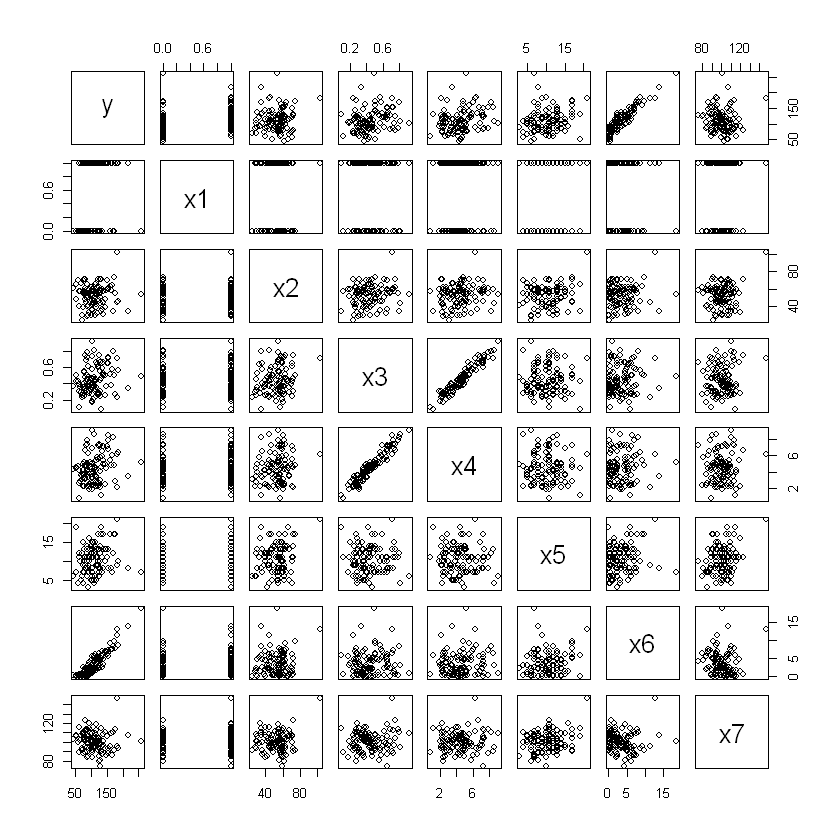

In [11]:
plot(dados)

Y está bem correlacionado com a covariável x6, observando o gráfico vemos essa maior influência.

#### 4. Ajustando o modelo

In [12]:
# modelando y em função das covariáveis
fit <- lm(y~x1+x2+x3+x4+x5+x6+x7,data=dados)

In [13]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.076  -6.026  -0.214   7.436  21.794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.46224   10.18764   7.309 7.02e-11 ***
x1          18.99352    2.03183   9.348 2.89e-15 ***
x2          -0.15909    0.08117  -1.960   0.0528 .  
x3          16.22563   20.72954   0.783   0.4357    
x4           1.12853    1.99299   0.566   0.5725    
x5           0.06316    0.28217   0.224   0.8233    
x6          10.02365    0.30531  32.831  < 2e-16 ***
x7          -0.15932    0.10050  -1.585   0.1161    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.08 on 99 degrees of freedom
Multiple R-squared:  0.928,	Adjusted R-squared:  0.9229 
F-statistic: 182.3 on 7 and 99 DF,  p-value: < 2.2e-16


$R^2$ do modelo foi 0.928. Ou seja, o modelo explica 92,8% da variabilidade de y;

$\overline{R^2}$, o critério de seleção, foi 0.9229;

Pelo teste F se rejeitou HO, ou seja, pelo menos um beta é diferente de zero e por isso existe relação de regressão;

O teste T, observando os p-valores, apenas o intercepto, x1 e x6 possuem betas diferentes de zero. Assumo então que x1 e x6 são variáveis importantes e precisam ficar no modelo.

**IMPORTANTE : Antes de acreditar nesses testes se faz necessário análise de diagnóstico.**

#### 5. Testando as suposições do modelo

    [S0] O modelo estah corretamente especificado
    [S1] A media dos erros eh zero
    [s2] Homoscedasticidade dos erros
    [S3] Nao autocorrelacao 
    [S4] Ausencia de Multicolinearidade
    [S5] Normalidade dos erros

Obs.: Para testes de hipoteses, se p-value < alpha (5%) 
entao rejeita a hipotese nula (H0)

In [14]:

#Testa [S0]
#Teste RESET de especificacao
#H0: O modelo estah corretamente especificado
resettest(fit)


	RESET test

data:  fit
RESET = 0.22665, df1 = 2, df2 = 97, p-value = 0.7976


p-valor > alpha(5%) 

Não se rejeita H0 de que o modelo está correto

In [15]:
#Testa [S1]
#Teste t para a média dos errros
#H0: média dos erros eh igual a zero
t.test(resid(fit),mu=0,alternative="two.sided")


	One Sample t-test

data:  resid(fit)
t = 0, df = 106, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.866551  1.866551
sample estimates:
mean of x 
        0 


p-valor > alpha(5%%)

Não se rejeita H0 de que a média dos erros é 0

In [16]:
#Testa [s2]
#Teste de Bressch-Pagan (Koenker) de Heteroscedasticidade
#H0: erros sao homoscedasticos
bptest(fit, studentize = TRUE)


	studentized Breusch-Pagan test

data:  fit
BP = 13.037, df = 7, p-value = 0.07121


p-valor > alpha(5%)

Não se rejeita H0 de que a variância dos erros são homoscedásticos

In [17]:
#Testa [S3]
#Teste de Durbin-Watson de autocorrelacao
#H0: : Nao hah autocorrelacao 
dwtest(fit)


	Durbin-Watson test

data:  fit
DW = 2.1676, p-value = 0.8131
alternative hypothesis: true autocorrelation is greater than 0


p-valor > alpha(5%) 

Não se rejeita H0, não há covariância dos erros

In [18]:
#Teste [S4]
#Usa Fatores de Inflacao de Variancia para detectar multicolinearidade
#Regra de bolso: vif > 10 indica multicolinearidade. vif=1 seria o ideal.
vif(fit)

x1        x2        x3        x4        x5        x6        x7 
 1.028139  1.084200 13.282074 13.152059  1.143658  1.070938  1.160900

Através dos vifs podemos obsevar que x1, x2, x6 e x7 temos o ideal.

Já em x3 e x4 vemos valores maiores que 10, um indicativo de multicolinearidade.

In [19]:
## Testa [S5]
## Teste Jarque-Bera de Normalidade
## H0: Os erros possuem distribuicao normal
jarque.bera.test(resid(fit))


	Jarque Bera Test

data:  resid(fit)
X-squared = 0.77308, df = 2, p-value = 0.6794


p-valor > alpha(5%)

Não se rejeita H0 de que os erros estão distribuídos normalmente

#### 6. Medidas de influência

In [20]:
n <- dim(dados)[1] # tamanho da amostra
n

[1] 107

In [21]:
#com a seguinte funcao se obtem varias medidas de influencia
influence.measures(fit)

Influence measures of
	 lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7, data = dados) :

       dfb.1_   dfb.x1    dfb.x2    dfb.x3    dfb.x4    dfb.x5    dfb.x6
1   -3.20e-02  0.09072  4.55e-02 -0.001744 -0.004387  0.044511 -0.076691
2   -1.48e-01 -0.15502  1.03e-02 -0.153481  0.157937 -0.163940  0.095701
3   -5.75e-02 -0.08807 -6.47e-02  0.024366 -0.071442  0.064358 -0.094804
4    3.57e-02  0.12694 -8.24e-02  0.003035 -0.054490 -0.066513 -0.011690
5    8.72e-03  0.01218 -2.70e-02  0.002890 -0.002153 -0.016041  0.001273
6   -3.49e-02 -0.03996 -2.35e-02  0.059244 -0.055189 -0.032523 -0.029397
7    1.20e-02 -0.00491  7.32e-03  0.004749 -0.006838 -0.006899  0.006007
8   -3.99e-02 -0.04534  3.08e-02 -0.031053  0.025592 -0.041182 -0.039673
9    2.13e-02  0.06557  3.18e-02  0.005744 -0.015555 -0.107713 -0.028209
10  -1.24e-01 -0.07584  1.25e-01 -0.104435  0.123074  0.068621  0.009610
11  -7.02e-02 -0.12923  1.80e-01 -0.042333 -0.001315 -0.044626 -0.072074
12  -9.40e-02 -0.20846 -2.80e-01

Onde há asteriscos está destacado que essas observações estão influenciando no modelo.

1          2          3          4          5          6          7 
0.02178708 0.03512995 0.07746800 0.03865031 0.05778326 0.06962982 0.10146704 
         8          9         10         11         12         13         14 
0.03675676 0.04262082 0.08698019 0.07293398 0.13680928 0.07279567 0.05030808 
        15         16         17         18         19         20         21 
0.10561345 0.11175010 0.04840864 0.15056403 0.10603994 0.08248920 0.07039208 
        22         23         24         25         26         27         28 
0.05586599 0.38482959 0.06344764 0.04018857 0.04366726 0.03879095 0.06088842 
        29         30         31         32         33         34         35 
0.06754655 0.03502440 0.04440550 0.08402614 0.04276507 0.07320432 0.04260517 
        36         37         38         39         40         41         42 
0.09501693 0.05099943 0.06812771 0.04192739 0.04816981 0.07282424 0.08768667 
        43         44         45         46         47         48         49 
0.05417283 0.13455301 0.10934475 0.03738041 0.04397502 0.08973847 0.04941028 
        50         51         52         53         54         55         56 
0.04227923 0.11075472 0.04594832 0.07234249 0.10924611 0.07132720 0.10602438 
        57         58         59         60         61         62         63 
0.07176365 0.04343339 0.06051469 0.04894322 0.10939489 0.04147197 0.14011073 
        64         65         66         67         68         69         70 
0.25512086 0.06534439 0.03740945 0.10605244 0.08676010 0.04105278 0.04772390 
        71         72         73         74         75         76         77 
0.06978678 0.04835231 0.10877131 0.03394857 0.04603733 0.07104893 0.09061425 
        78         79         80         81         82         83         84 
0.11382064 0.10316351 0.04799903 0.16837885 0.08597310 0.05210464 0.09884779 
        85         86         87         88         89         90         91 
0.09634424 0.06344470 0.04515507 0.07035836 0.04407741 0.04508333 0.10750459 
        92         93         94         95         96         97         98 
0.06086509 0.05993740 0.07571746 0.09881485 0.04383572 0.04112350 0.03191369 
        99        100        101        102        103        104        105 
0.09798947 0.11435457 0.06826724 0.06099468 0.04795159 0.05076938 0.03942866 
       106        107 
0.07637439 0.07086841

18 23 64 81 
18 23 64 81

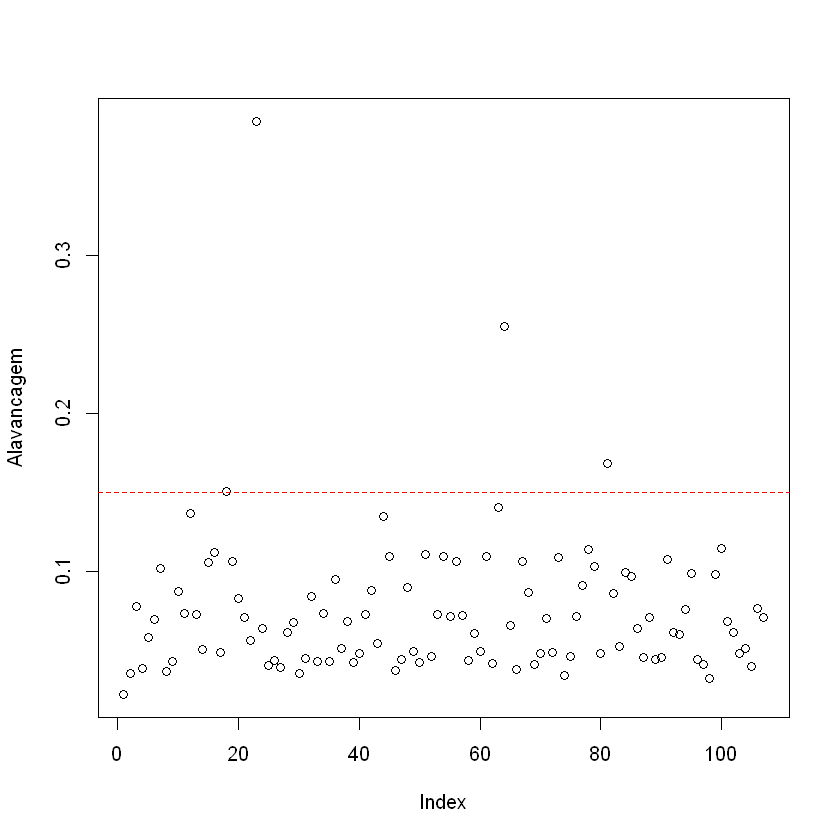

In [22]:
#alavancagem
hatvalues(fit)
h_bar<-fit$rank / n
limite<-2*h_bar
abline(plot(hatvalues(fit),ylab="Alavancagem"), 
       col="red", h=limite,lty=2)
which(hatvalues(fit)>limite)

Temos 3 observações completemente fora do tracejado do gráfico acima. Provávelmente alguma daquelas observações com o asterisco

1            2            3            4            5            6 
 0.187205622 -0.358181359 -0.302019838  0.299026964  0.039665263 -0.118072201 
           7            8            9           10           11           12 
 0.020358040 -0.108844332  0.154952227 -0.239316328  0.304203374  0.493056042 
          13           14           15           16           17           18 
 0.146874443 -0.004989477  0.224489749  0.163566879  0.200165150 -0.179268673 
          19           20           21           22           23           24 
-0.485573906  0.037598849  0.112909970  0.002926695 -2.144144858  0.085818374 
          25           26           27           28           29           30 
 0.101214086 -0.465579251 -0.016029219 -0.253568447 -0.104693497 -0.263499818 
          31           32           33           34           35           36 
-0.018536729  0.072688723 -0.152813584 -0.579645453 -0.122545930  0.541852649 
          37           38           39           40           41           42 
 0.095726916 -0.113592230 -0.034777931 -0.124014697  0.531967244 -0.167624030 
          43           44           45           46           47           48 
-0.426016129  0.381153537  0.097148071 -0.219496718 -0.054956957 -0.241238080 
          49           50           51           52           53           54 
 0.101122575  0.207788516  0.051686883 -0.075716062 -0.155946370 -0.421475871 
          55           56           57           58           59           60 
-0.138091661 -0.266888988  0.114646921 -0.039992402  0.396142484 -0.178784158 
          61           62           63           64           65           66 
 0.041312499  0.201222887 -0.002921059  0.518897557 -0.191899437 -0.078004412 
          67           68           69           70           71           72 
-0.124334442 -0.086729494  0.297550122  0.237011779  0.214127344  0.224428600 
          73           74           75           76           77           78 
 0.722434109  0.027466420 -0.230194054 -0.252050504 -0.327529978 -0.328056792 
          79           80           81           82           83           84 
-0.033501386  0.507972609 -0.108266689 -0.048688708  0.024986327 -0.532711872 
          85           86           87           88           89           90 
 0.285902723 -0.542049764  0.297342055 -0.545623366  0.232444382  0.159033713 
          91           92           93           94           95           96 
-0.307839541  0.296268846 -0.161147713  0.645757185 -0.200064926  0.229934834 
          97           98           99          100          101          102 
-0.050952026 -0.049582129 -0.507351854  0.420416815 -0.058267367  0.121063211 
         103          104          105          106          107 
 0.115681436  0.050576013  0.276566616  0.294380965  0.081788381

23 34 73 94 
23 34 73 94

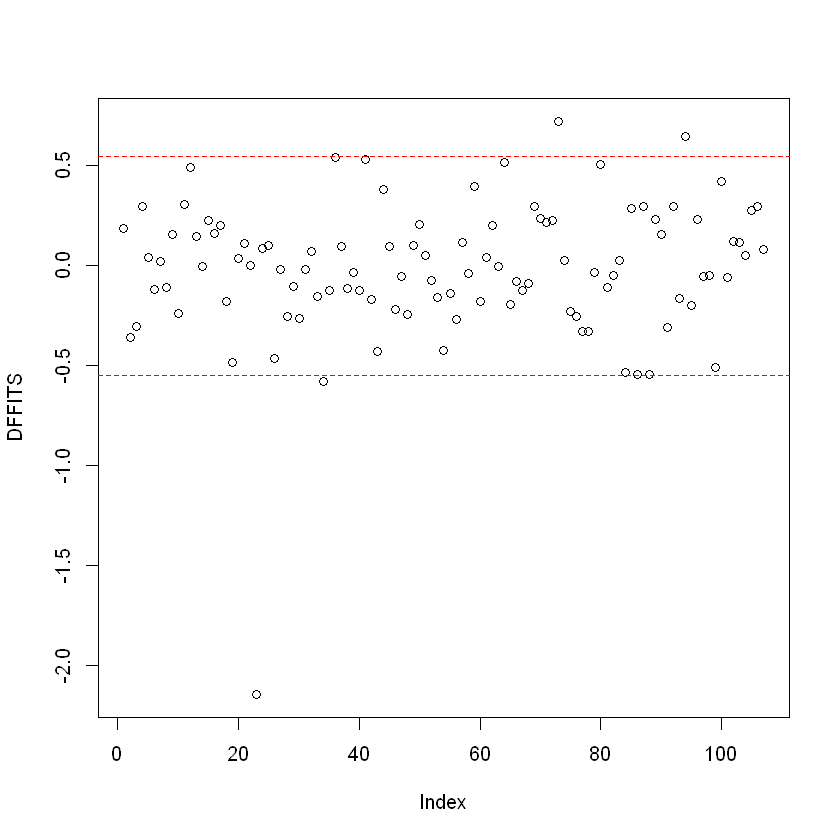

In [23]:
#DFFIT
dffits(fit)
limite<-2*sqrt(fit$rank / n)
abline(plot(dffits(fit),ylab="DFFITS"), 
       col="red", h=c(-limite,limite),lty=2)
which(abs(dffits(fit))>limite)

Aqui duas possíveis observações que podem influenciar o modelo, e podemos tirá-las para ajustar novamente o modelo

In [24]:
#DFBETA
dfbetas(fit) # cada beta tem seu DF

dfb1<-dfbetas(fit)[,1]
dfb2<-dfbetas(fit)[,2]
dfb3<-dfbetas(fit)[,3]
dfb4<-dfbetas(fit)[,4]
dfb5<-dfbetas(fit)[,5]
dfb6<-dfbetas(fit)[,6]
dfb7<-dfbetas(fit)[,7]

,(Intercept),x1,x2,x3,x4,x5,x6,x7
1,-0.0319532557,0.090716025,4.554906e-02,-0.001743729,-0.0043873271,0.0445110727,-0.0766907608,0.0143512373
2,-0.1481766543,-0.155017826,1.028733e-02,-0.153480991,0.1579369300,-0.1639399754,0.0957012843,0.1840414071
3,-0.0574803948,-0.088067652,-6.467799e-02,0.024366251,-0.0714420820,0.0643584692,-0.0948040645,0.1191792414
4,0.0356763727,0.126941010,-8.238970e-02,0.003034729,-0.0544895341,-0.0665128595,-0.0116903140,0.0639530205
5,0.0087152829,0.012182781,-2.696485e-02,0.002889713,-0.0021528073,-0.0160407965,0.0012727978,0.0065029333
6,-0.0349187231,-0.039956178,-2.352637e-02,0.059243860,-0.0551891315,-0.0325226668,-0.0293966789,0.0536267016
7,0.0120059159,-0.004908990,7.317087e-03,0.004748506,-0.0068379112,-0.0068989696,0.0060070783,-0.0109134578
8,-0.0398592013,-0.045342977,3.078345e-02,-0.031053134,0.0255915297,-0.0411821909,-0.0396732219,0.0495393184
9,0.0213456578,0.065569307,3.176228e-02,0.005743587,-0.0155551185,-0.1077127314,-0.0282088493,0.0070373244
10,-0.1240203444,-0.075844616,1.254672e-01,-0.104435204,0.1230739853,0.0686207575,0.0096104568,0.0386522918


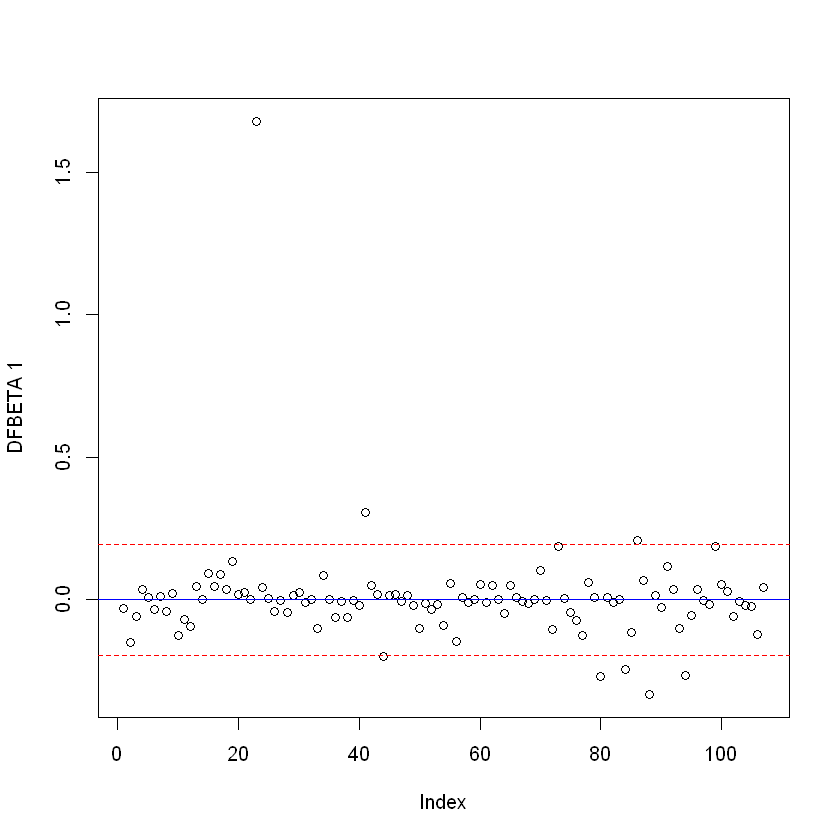

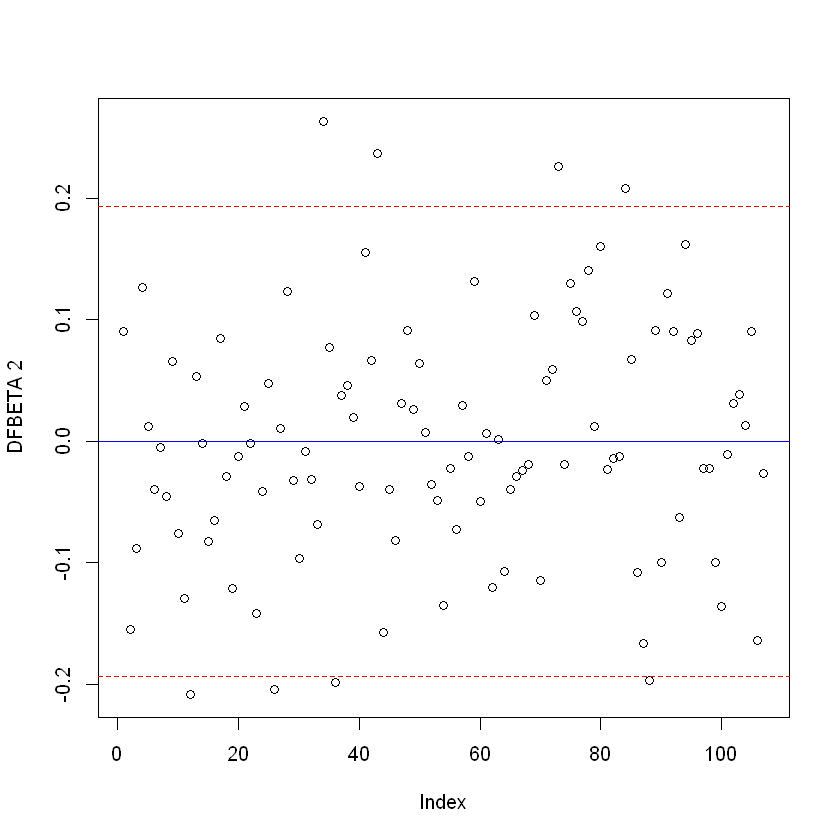

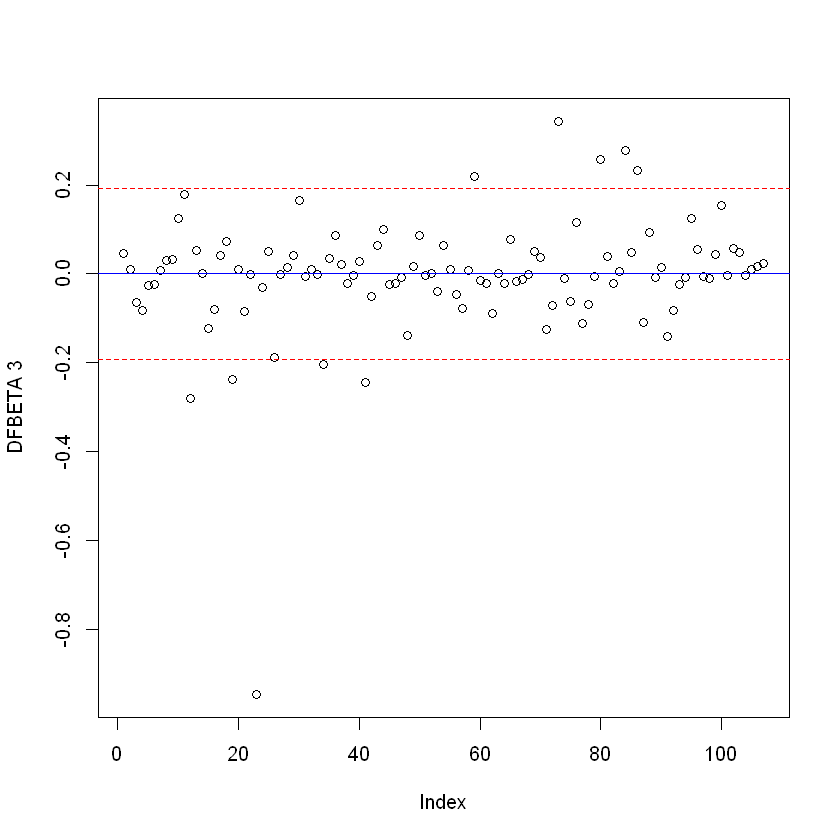

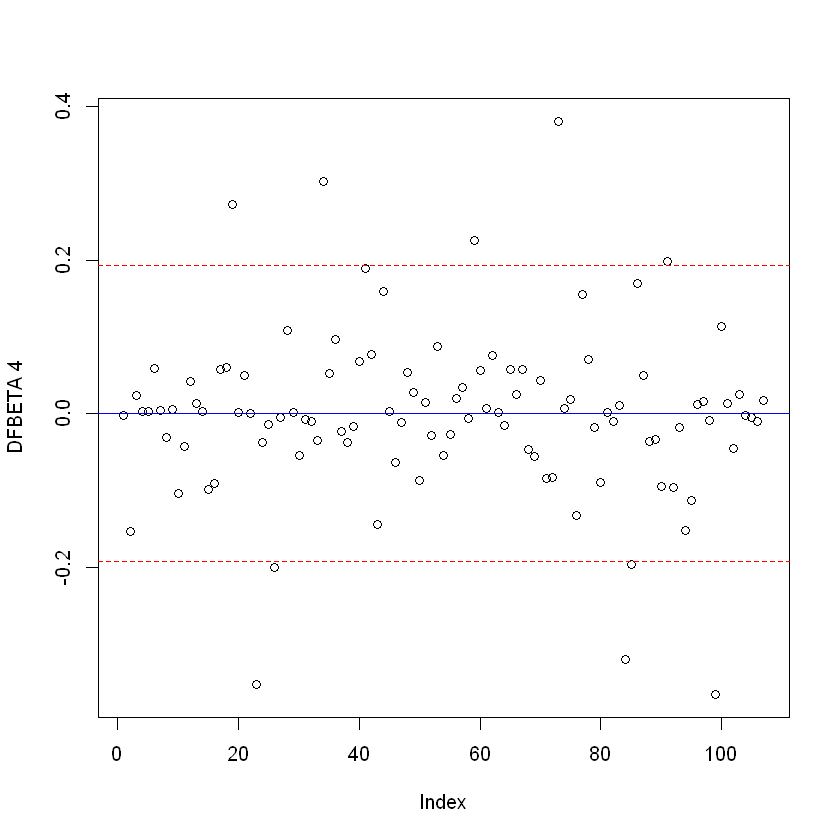

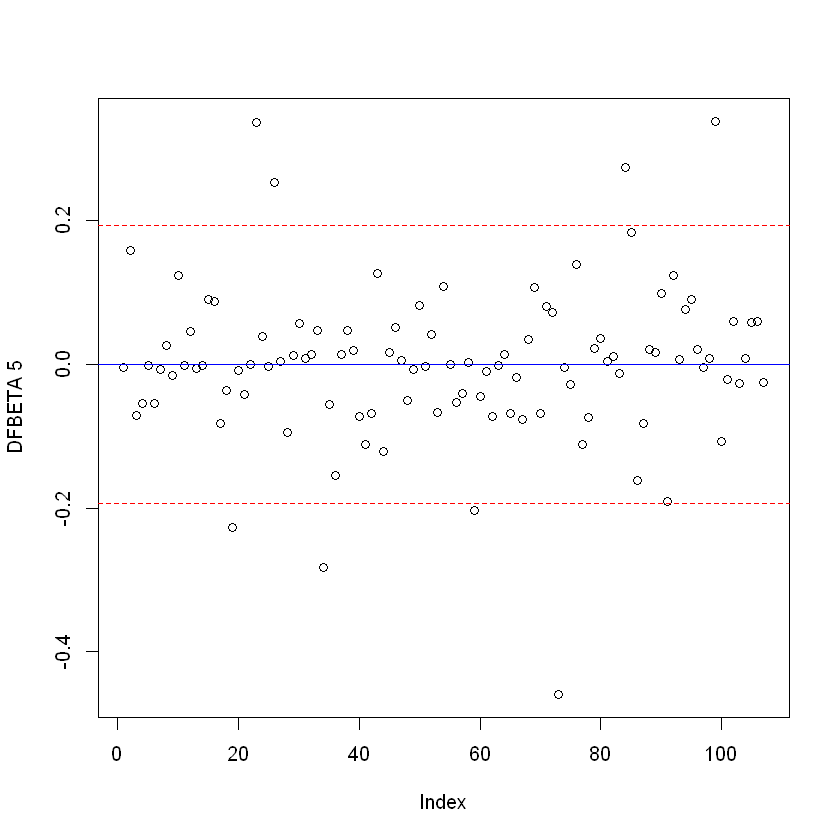

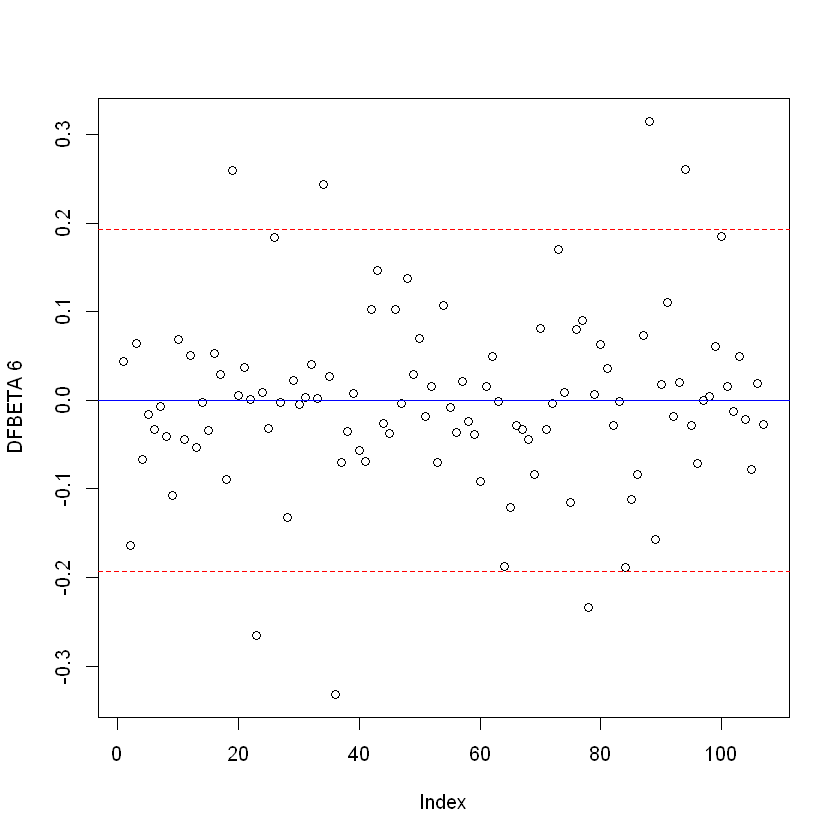

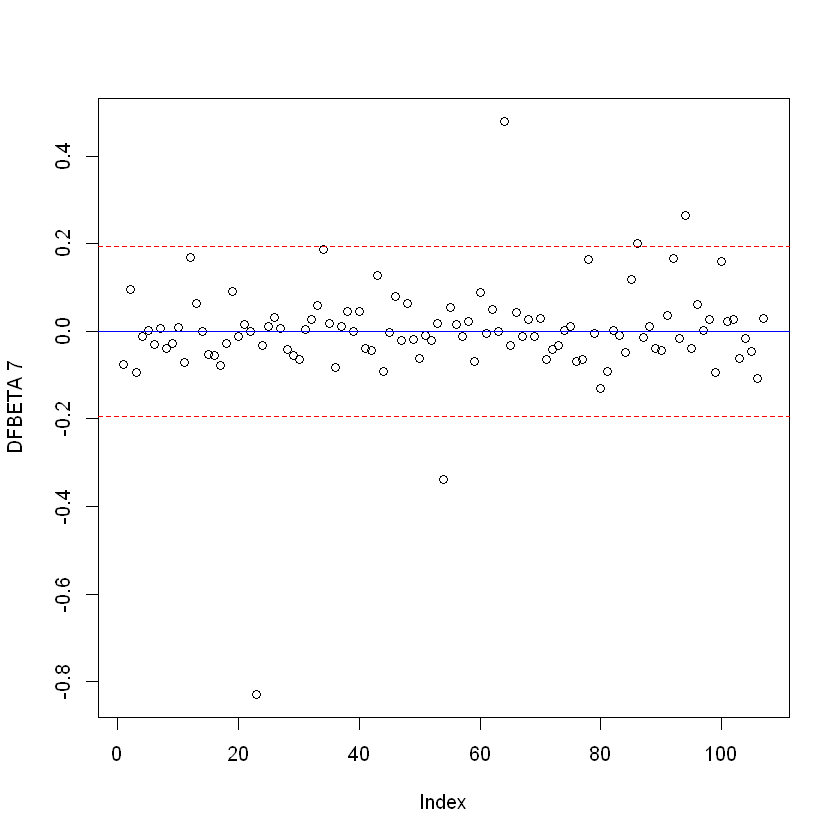

In [25]:
limite<-2/sqrt(n)
abline(plot(dfb1,ylab="DFBETA 1"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb2,ylab="DFBETA 2"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb3,ylab="DFBETA 3"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb4,ylab="DFBETA 4"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb5,ylab="DFBETA 5"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb6,ylab="DFBETA 6"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

abline(plot(dfb7,ylab="DFBETA 7"), 
       col=c("red","blue","red"), h=c(-limite,0,limite),lty=c(2,1,2))

1            2            3            4            5            6 
4.355511e-03 1.563809e-02 1.139207e-02 1.104063e-02 1.986214e-04 1.757073e-03 
           7            8            9           10           11           12 
5.233290e-05 1.491273e-03 3.015305e-03 7.187995e-03 1.154690e-02 3.022505e-02 
          13           14           15           16           17           18 
2.716412e-03 3.143599e-06 6.336143e-03 3.371076e-03 5.019029e-03 4.050654e-03 
          19           20           21           22           23           24 
2.918160e-02 1.784837e-04 1.607083e-03 1.081617e-06 5.400358e-01 9.289625e-04 
          25           26           27           28           29           30 
1.290382e-03 2.610732e-02 3.244260e-05 8.037795e-03 1.381938e-03 8.599714e-03 
          31           32           33           34           35           36 
4.338629e-05 6.668038e-04 2.933140e-03 4.066220e-02 1.889835e-03 3.604645e-02 
          37           38           39           40           41           42 
1.155134e-03 1.626428e-03 1.526877e-04 1.936069e-03 3.446742e-02 3.537513e-03 
          43           44           45           46           47           48 
2.219990e-02 1.817179e-02 1.190822e-03 6.007744e-03 3.811304e-04 7.304705e-03 
          49           50           51           52           53           54 
1.288678e-03 5.398206e-03 3.372755e-04 7.230494e-04 3.061187e-03 2.210511e-02 
          55           56           57           58           59           60 
2.401901e-03 8.939783e-03 1.656880e-03 2.018915e-04 1.933558e-02 4.010822e-03 
          61           62           63           64           65           66 
2.154867e-04 5.064613e-03 1.077456e-06 3.372970e-02 4.625285e-03 7.671215e-04 
          67           68           69           70           71           72 
1.949508e-03 9.490783e-04 1.094888e-02 7.013258e-03 5.753915e-03 6.296576e-03 
          73           74           75           76           77           78 
6.314901e-02 9.524192e-05 6.617111e-03 7.954791e-03 1.339912e-02 1.347472e-02 
          79           80           81           82           83           84 
1.417103e-04 3.096649e-02 1.479287e-03 2.992705e-04 7.882675e-05 3.491303e-02 
          85           86           87           88           89           90 
1.024168e-02 3.552955e-02 1.095531e-02 3.614215e-02 6.742101e-03 3.176362e-03 
          91           92           93           94           95           96 
1.187122e-02 1.093277e-02 3.265624e-03 5.005710e-02 5.035544e-03 6.598541e-03 
          97           98           99          100          101          102 
3.276226e-04 3.101981e-04 3.173672e-02 2.201177e-02 4.285136e-04 1.846481e-03 
         103          104          105          106          107 
1.685274e-03 3.228467e-04 9.478468e-03 1.082727e-02 8.439445e-04

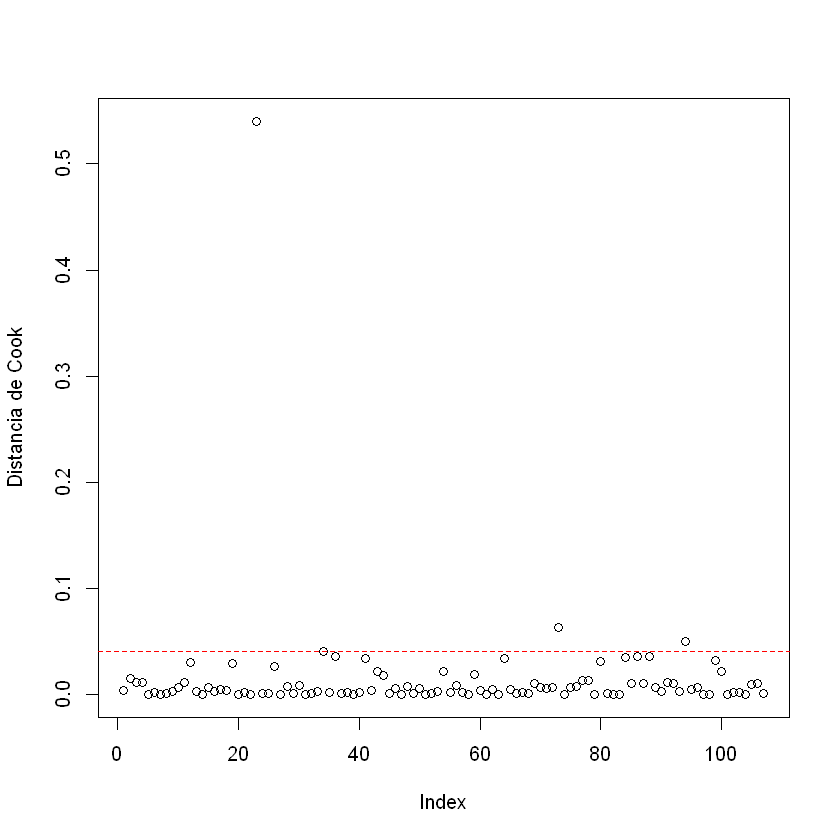

In [26]:
#distancia de Cook
cooks.distance(fit)
limite<-4/(n-fit$rank )
abline(plot(cooks.distance(fit),ylab="Distancia de Cook"), 
       col="red", h=limite,lty=2)

No gráfico de Distância de Cook vemos 3 possíveis observações influentes, porém há uma que se destaca que estaria entre 20 e 40.

In [27]:
#residuo
residuo <- rstudent(fit) # residuo studentizado

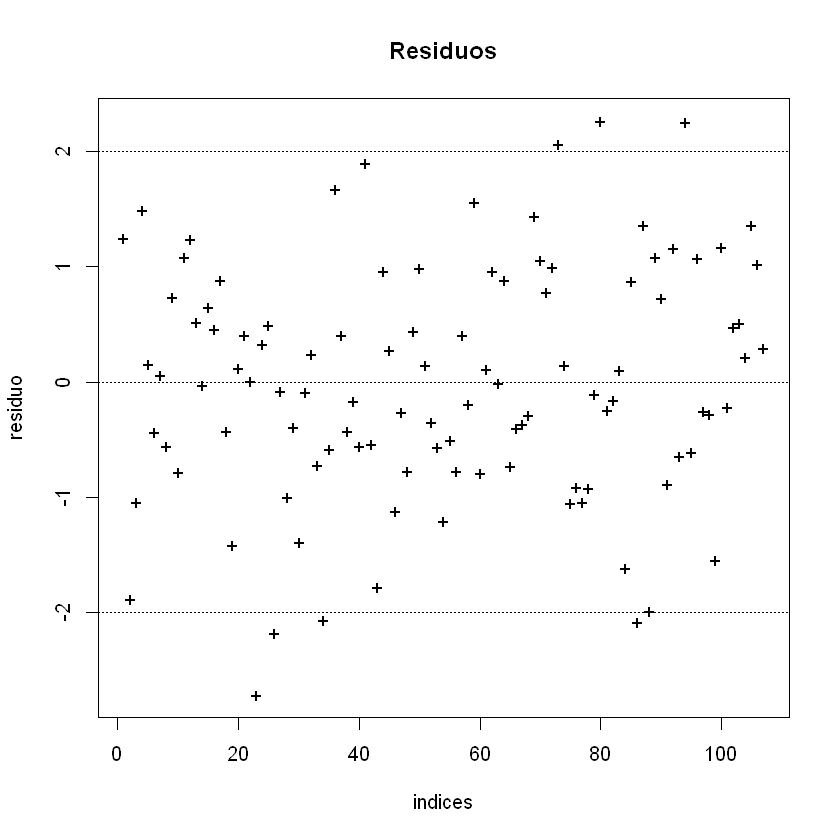

In [28]:
plot(residuo,type='p',pch="+",main="Residuos",xlab="indices") # plota os residuos do modelo
abline(h=c(-2,0,2),lty=3) # inclui linhas horizontais no grafico

Há alguns valores do resíduo que estão fora dos limites -2 e 2, talvez o modelo ajustado não está adequado.

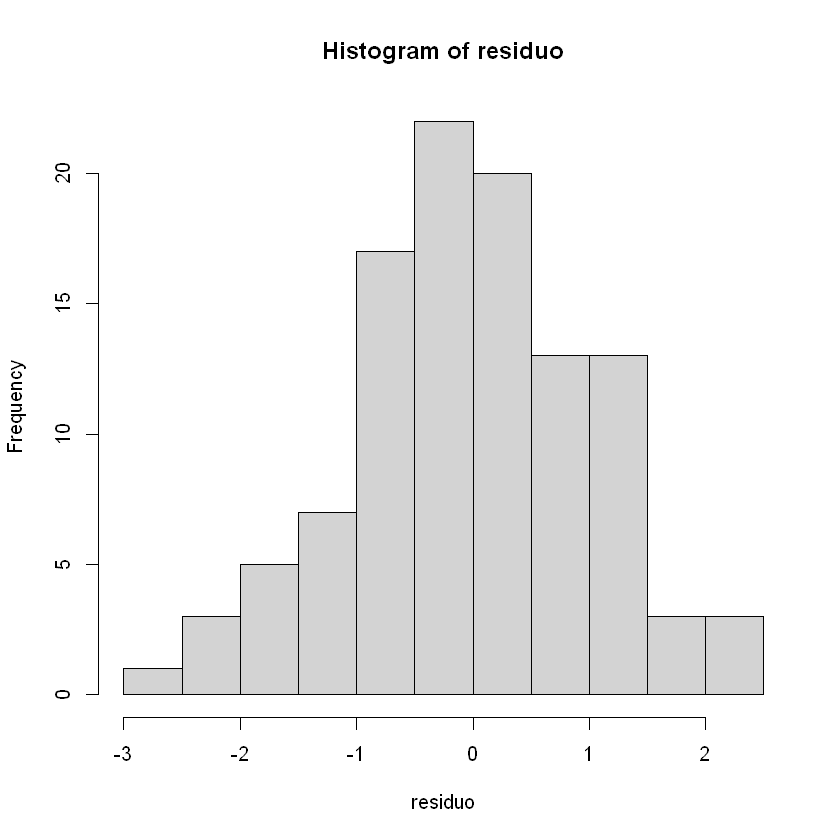

In [29]:
hist(residuo)

Acima podemos observar que a distribuição dos resíduos se parece com uma normal

Gaussian model (lm object) 


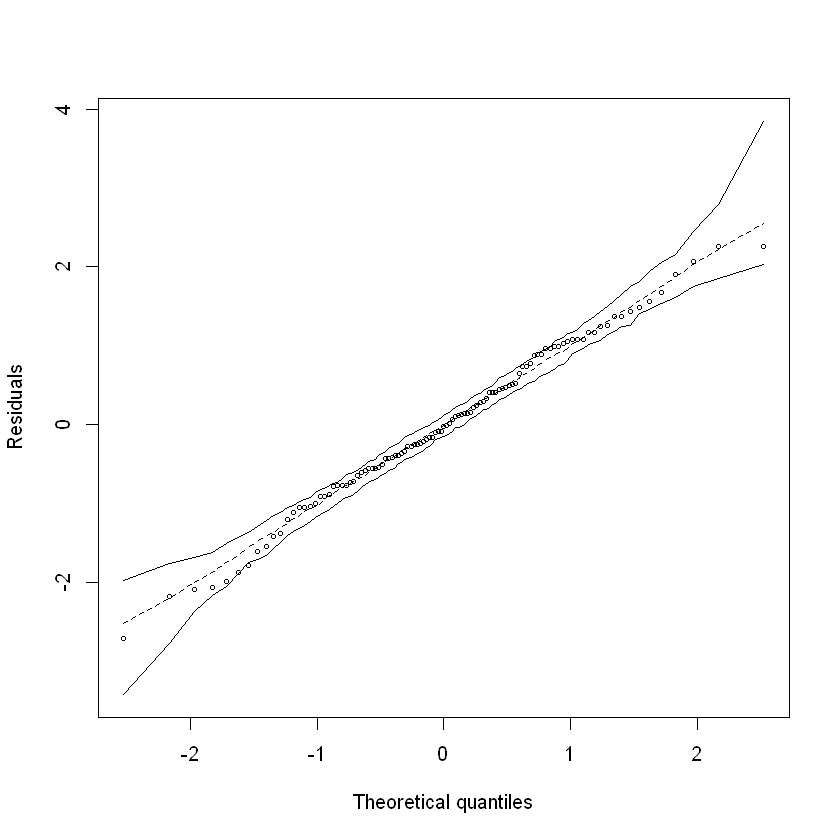

In [30]:
#envelope simulado baseado nos residuos studentizados
hnp(fit,resid.type="student",halfnormal = F) # envelope simulado 

Acima no gráfico do envelope dos resíduos, temos eles "studentizados" e ordenados. Esse envelope são bandas de confiança e esperamos que pelo menos 90% dos resíduos estejam entre essas bandas. Essas bandas são feitas através de simulações de Monte Carlo. 

Esse envelope indica, principalmente, que a suposição distribucional está correta. Ou seja, a distribuição normal é correta para modelar esses dados.

#### 7. Ajustando o modelo final

Como vimos pelo gráfico da correlação e pelo "VIF" temos que remover ou x3 ou x4 por conta da multicolinearidade. Vou remover x3, pois x4 tem uma correlação um pouco maior com y.

Além disso, também vou remover a observação mais influente. Pelo teste de "Distância de cook" aparentava ser a 23.

In [31]:
dados23<-dados[-23,]
head(dados23, 25)

,y,x1,x2,x3,x4,x5,x6,x7
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,110.038,1,57.361,0.434,4.317,12,1.715,104.320
2,86.445,1,52.070,0.437,4.052,13,2.221,94.936
3,152.419,1,61.397,0.727,7.854,8,7.148,87.870
4,114.720,1,42.482,0.244,2.297,9,2.272,103.660
5,111.444,1,29.660,0.449,4.509,6,2.444,101.167
6,147.882,1,58.217,0.363,4.506,13,6.971,86.432
7,123.536,0,61.943,0.267,2.424,6,6.338,79.273
8,143.982,1,47.733,0.505,4.992,13,6.381,93.894
9,99.109,1,53.535,0.396,3.930,5,1.153,99.304


Linha 23 removida

In [32]:
#ajustando o modelo sem x3
fit <- lm(y~x1+x2+x4+x5+x6+x7,data=dados23)

In [33]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x4 + x5 + x6 + x7, data = dados23)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0708  -5.7216  -0.1619   6.6116  21.7240 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 56.68806   11.58663   4.893 3.86e-06 ***
x1          19.19813    1.97448   9.723 4.40e-16 ***
x2          -0.08273    0.08347  -0.991    0.324    
x4           2.62832    0.54741   4.801 5.60e-06 ***
x5           0.13381    0.27528   0.486    0.628    
x6          10.23402    0.30851  33.173  < 2e-16 ***
x7          -0.03100    0.10409  -0.298    0.766    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.785 on 99 degrees of freedom
Multiple R-squared:  0.9295,	Adjusted R-squared:  0.9252 
F-statistic: 217.4 on 6 and 99 DF,  p-value: < 2.2e-16


$R^2$ do modelo foi 0.929. Ou seja, o modelo explica 92,9% da variabilidade de y;

$\overline{R^2}$, o critério de seleção, foi 0.9252;

Apesar da pequeníssima melhora não podemos comparar ambos os modelos, através do R2 ajustado, pois ao remover a linha 23 já não se trata mais do mesmo dataframe.

In [34]:
predict(fit) #valores preditos na amostra usada na estimação

1         2         3         4         5         6         7         8 
 98.40975 103.75416 162.94840  99.65092 107.96169 153.31412 121.14267 149.18945 
        9        10        11        12        13        14        15        16 
 91.17642  91.32023  68.77800 158.16256 162.69408 128.80392  63.02111  64.85648 
       17        18        19        20        21        22        24        25 
 82.08855 136.85361  84.64256  58.47435 132.83177  82.33123  69.84812 115.65954 
       26        27        28        29        30        31        32        33 
100.18289  77.03371 124.61863 149.72699 128.03761 102.37446 159.51502  84.32815 
       34        35        36        37        38        39        40        41 
 64.67405  88.14599  57.89311 110.61147  62.47003  92.00138 102.25364 113.69395 
       42        43        44        45        46        47        48        49 
116.82523  66.51073  72.82609 104.75486  87.03090 137.15350  65.45974 120.84003 
       50        51        52        53        54        55        56        57 
104.78685 101.30571 123.89260 114.09652 193.93030  92.71043 132.67192  95.59025 
       58        59        60        61        62        63        64        65 
 86.88424 105.76606  84.98074  93.12601 117.44774 124.17431 255.77549 148.48516 
       66        67        68        69        70        71        72        73 
 82.87424 158.28431 104.24933 123.99918 110.44988  81.79415  97.72573 109.73937 
       74        75        76        77        78        79        80        81 
108.44646 110.67072 108.78888 114.39010  62.37674  93.79427  96.88759 222.17451 
       82        83        84        85        86        87        88        89 
133.16644  62.86105 115.47027 159.67611  82.50775  89.26257 106.26842  90.63612 
       90        91        92        93        94        95        96        97 
 86.75737  86.63726 175.37802 132.72520 158.96653 123.20813 144.39657 106.65638 
       98        99       100       101       102       103       104       105 
 82.67466 131.09261 162.97864  88.37077 150.59141  82.58873  89.16575 113.10112 
      106       107 
 77.58322 122.03232

In [35]:
m1 <- mean(dados23$x1)
m2 <- mean(dados23$x2)
m4 <- mean(dados23$x4)
m5 <- mean(dados23$x5)
m6 <- mean(dados23$x6)
m7 <- mean(dados23$x7)
cat(m1, m2, m4, m5, m6, m7, "\n")

0.6132075 52.32574 4.500566 10.36792 3.524755 99.99774 


In [38]:
# Predicao com novos dados
novos_dados <- data.frame(cbind(
  x1=0.6132075, x2=52.32574, x4=4.500566, x5=10.36792, 
  x6=3.524755, x7=99.99774)
)
predict(fit, newdata=novos_dados) # com novos valores (fora da amostra)

1 
110.3198

No código acima fiz predições de y baseado nas médias das covariadas. Retornando 110.31

#### 8. O modelo final

$y = \beta_1+\beta_2.x1+\beta_3.x2+\beta_4.x4+\beta_5.x5+\beta_6.x6+\beta_7.x7$

Porém a função ster(.) pode nos sugerir um modelo melhor

In [40]:
step(fit) # seleciona modelo baseado no AIC e stepwise
# neste caso o modelo eh ok e o step nao excluiu covariaveis

Start:  AIC=490.29
y ~ x1 + x2 + x4 + x5 + x6 + x7

       Df Sum of Sq    RSS    AIC
- x7    1         8   9487 488.38
- x5    1        23   9501 488.54
- x2    1        94   9572 489.34
<none>                9478 490.29
- x4    1      2207  11685 510.48
- x1    1      9051  18529 559.35
- x6    1    105354 114832 752.71

Step:  AIC=488.38
y ~ x1 + x2 + x4 + x5 + x6

       Df Sum of Sq    RSS    AIC
- x5    1        19   9505 486.59
- x2    1        91   9578 487.40
<none>                9487 488.38
- x4    1      2200  11686 508.49
- x1    1      9055  18542 557.42
- x6    1    110189 119675 755.08

Step:  AIC=486.59
y ~ x1 + x2 + x4 + x6

       Df Sum of Sq    RSS    AIC
- x2    1        85   9590 485.53
<none>                9505 486.59
- x4    1      2181  11686 506.49
- x1    1      9144  18649 556.03
- x6    1    112659 122165 755.27

Step:  AIC=485.53
y ~ x1 + x4 + x6

       Df Sum of Sq    RSS    AIC
<none>                9590 485.53
- x4    1      2104  11694 504.56
- x1  


Call:
lm(formula = y ~ x1 + x4 + x6, data = dados23)

Coefficients:
(Intercept)           x1           x4           x6  
      50.87        19.32         2.53        10.27  


A função step(.) tirou o x2, x5 e x7. Vou fazer um ajuste rápido pra ver se o R ajustado melhora

In [41]:
#ajustando o modelo sem x2, x3, x5 e x7
fit <- lm(y~x1+x4+x6,data=dados23)

In [42]:
summary(fit)


Call:
lm(formula = y ~ x1 + x4 + x6, data = dados23)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0738  -5.3173  -0.2432   7.0307  23.2082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.8737     2.9033  17.523  < 2e-16 ***
x1           19.3200     1.9449   9.934  < 2e-16 ***
x4            2.5298     0.5348   4.730 7.22e-06 ***
x6           10.2740     0.2967  34.630  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.696 on 102 degrees of freedom
Multiple R-squared:  0.9286,	Adjusted R-squared:  0.9265 
F-statistic: 442.4 on 3 and 102 DF,  p-value: < 2.2e-16


nenhuma mudança significativa no R ajustado, porém podemos ter a conclusão de que os $\beta$ associados à x2, x3, x5 e x7 são zeros.

Logo o modelo final é:

$y = \beta_1+\beta_2.x1+\beta_3.x4+\beta_4.x6$